# AON Machine Learning Project:
## Early Careers: Data Science

### Mario Alberto Montoya Llamas

#### 11/19/2021

**The Task:** Predict assesed taxes for homes in Somerville, MA. ("TAX VALUE")

**The Dataset**: https://catalog.data.gov/dataset/assessors-property-database-fy14-fy19

In [32]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

## Part 1: Exploratory Data Analysis

### 1.1 Background:

The State Department of Revenue (DOR) has approves assessed values each fiscal year for the Somerville Board of Assessors. The assessed values and data presented reflects information available for the FY 2014-2019 actual tax bills issued January 1 of each year. Assessments for each fiscal year have an effective market date of January 1 of the preceding year.

In [33]:
rawData = pd.read_csv("Assessor_s_Property_Database_FY14-FY19 (1).csv")
rawData.head(5)

,T-CODE,FISCAL_YEAR,MAP,BLOCK,LOT,UNIT,PARCEL ID,PCC,PCC DESCRIPT,ACCOUNT,...,Path,ROOF STRUCTURE DESCRIP,ROOF COVER DESCRIP,INT WALL 1 DESCRIP,INT WALL 2 DESCRIP,INT FLOOR 1 DESCRIP,INT FLOOR 2 DESCRIP,HAS GARAGE,Sub Lots,AV PID
0,274,2014,13,A,25A,NaN,013A0025A000000,1010,SING FAMLY,1720,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,274,2014,24,G,1,NaN,024G00001000000,9300,CITY VACANT,4120,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,274,2014,27,B,3,NaN,027B00003000000,3920,UNDEV LAND,4414,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,274,2014,34,D,21,NaN,034D00021000000,1050,THREE FAM,5508,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,274,2014,37,B,1,NaN,037B00001000000,972V,MBTA VACANT,5704,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Colums
print("Columns:")
print( rawData.columns.values )
print("Shape:")
rawData.shape

Columns:
['T-CODE' 'FISCAL_YEAR' 'MAP' 'BLOCK' 'LOT' 'UNIT' 'PARCEL ID' 'PCC'
 'PCC DESCRIPT' 'ACCOUNT' 'HOUSE NO' 'STREET' 'COMMITMENT OWNER'
 'CURRENT OWNER' 'CURRENT CO-OWNER' 'OWNER ADD' 'OWNER CITY' 'OWNER STATE'
 'OWNER ZIP' 'SALE PRICE' 'SALE DATE' 'BOOK PAGE' 'CERT NO' 'BOARDER FLAG'
 'SALE VALID' 'WARD' 'PRECINCT' 'PARCEL VAL' 'LAND VAL' 'IMPROVE VAL'
 'SQFT' 'NHBD' 'SITE INDEX' 'BDLD NO' 'OCCUP' 'STYLE DESCRIP' 'STORIES'
 'WALL TYPE 1' 'WALL TYPE 2' 'HEAT TYPE' 'FUEL TYPE' 'AC TYPE'
 'GROSS AREA' 'LIVING AREA' 'ROOMS' 'BEDROOM' 'BATH' 'BATH DESCRIP'
 'KITCHEN DESCRIP' 'PERCENT GOOD' 'GRADE DESCRIP' 'YEAR' 'RESX FLAG'
 'LOCAL HISTORICAL' 'NATIONAL HISTORICAL' 'ZONE' 'ZONE DESP' 'EXEMPT AMT'
 'TAX VALUE' 'Item Type1' 'Path1' 'Item Type' 'Path'
 'ROOF STRUCTURE DESCRIP' 'ROOF COVER DESCRIP' 'INT WALL 1 DESCRIP'
 'INT WALL 2 DESCRIP' 'INT FLOOR 1 DESCRIP' 'INT FLOOR  2 DESCRIP'
 'HAS GARAGE' 'Sub Lots' 'AV PID']
Shape:


(107899, 72)

### 1.2: 'TAX VALUE' of 0 Dollars ?
Knowing that the goal is to predict the assesed Taxes for homes, in this case the colum ("TAXED VALUE"). Let's take a closer look at its behavior in the data.

In [35]:
#Removing the Outliers
print( rawData["TAX VALUE"].describe() )
print( np.sort(rawData["TAX VALUE"]) )

count    1.068660e+05
mean     8.049929e+03
std      2.645514e+04
min      0.000000e+00
25%      3.451988e+03
50%      5.692790e+03
75%      8.483712e+03
max      2.010341e+06
Name: TAX VALUE, dtype: float64
[ 0.  0.  0. ... nan nan nan]


Within our data, we notice that we have NAN and 0 values combined together, it only takes a closer look to the data frame where TAX VALUE equals 0 to notice that this is indeed, incomplete data.

In [36]:
rawData[rawData["TAX VALUE"] == 0].head(10)

,T-CODE,FISCAL_YEAR,MAP,BLOCK,LOT,UNIT,PARCEL ID,PCC,PCC DESCRIPT,ACCOUNT,...,Path,ROOF STRUCTURE DESCRIP,ROOF COVER DESCRIP,INT WALL 1 DESCRIP,INT WALL 2 DESCRIP,INT FLOOR 1 DESCRIP,INT FLOOR 2 DESCRIP,HAS GARAGE,Sub Lots,AV PID
1,274,2014,24,G,1,NaN,024G00001000000,9300,CITY VACANT,4120,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,274,2014,37,B,1,NaN,037B00001000000,972V,MBTA VACANT,5704,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,274,2014,37,F,6,NaN,037F00006000000,9300,CITY VACANT,5900,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,274,2014,42,B,15,NaN,042B00015000000,9300,CITY VACANT,8729,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,274,2014,61,D,1B,NaN,061D0001B000000,9300,CITY VACANT,13018,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,274,2014,65,A,45,NaN,065A00045000000,9300,CITY VACANT,14406,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,274,2014,82,B,14,NaN,082B00014000000,972V,MBTA VACANT,18133,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,274,2014,32,C,2,NaN,032C00002000000,9300,CITY VACANT,99737110,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,274,2014,111,A,11,NaN,111A00011000000,972V,MBTA VACANT,27619,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,274,2014,113,B,6,NaN,113B00006000000,9730,VACANT HOUS,27815,...,sites/cos/ospcd/Lists/Assessor Data FY2014 051...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3: What defines a HOME ?

The target is to predict assesed taxes for homes in Somerville, MA. However, the data includes assesed values for multiple types of properties.

https://www.acgov.org/MS/prop/useCodeList.aspx

In [37]:
print( rawData[["ZONE DESP","TAX VALUE"]].groupby("ZONE DESP").count() )

            TAX VALUE
ZONE DESP            
ASSEMBLY S        235
BUSINESS A       1927
BUSINESS B        857
CENTRAL BU        623
CORRIDOR C       1883
INDUSTRIAL       1597
NEIGHBORHO       2309
NORTH POIN          8
OPEN SPACE        342
RESIDENCE       94615
TRANSIT             5
TRANSIT OR        821
UNIVERSITY        244


###  1.4 Trimming our data, Focusing on `Zone Desp` == `RESIDENCE`

Not that we've looked at the particularities of our data. Let us trim it in order to have a cleaner dataset for our Feature Engineering portion of the project.

In [38]:
#Houses where TAX VALUE greater than 0
houseDF = rawData[rawData["TAX VALUE"] > 0]
#Houses where the zone is defined as a residence
houseDF = houseDF[ (houseDF["ZONE DESP"] == "RESIDENCE")]
#We contain 1 to more rooms, while some might be a studio, ROOMS == 0 has a lot of outliers.
houseDF = houseDF[houseDF["ROOMS"] >= 1]
houseDF = houseDF[houseDF["BEDROOM"] >= 1]
#Houses have HOUSE Numbers
houseDF = houseDF[houseDF["HOUSE NO"] > 0]
houseDF[["PCC DESCRIPT","TAX VALUE"]].groupby("PCC DESCRIPT").count()

#( rawData["ZONE DESP"] == "RESIDENCE")
#rawData[ (rawData["ZONE DESP"] == "NEIGHBORHO")]

,TAX VALUE
PCC DESCRIPT,
1 FAM MIX,105
2 FAM MIX,132
3 FAM MIX,148
APT 4-8 M,946
APT 4-8 MD,1869
APT OVER 8,25
CONDO MU,7
CONDO MDL,8107
CONDO MDL-,17990


### Part 1.5: TAX VALUE and LOG TAX VALUE through the years

Let us take a closer look to the median and average tax values in Somerville, and see how this value has changes through the years.

In [39]:
edaDF = houseDF
edaDF = edaDF[ edaDF["FISCAL_YEAR"] < 2019]
edaDF['LOG TAX VALUE'] = np.log(edaDF["TAX VALUE"])

#Retrieve Median
stats = edaDF[["FISCAL_YEAR","TAX VALUE"]].groupby("FISCAL_YEAR").median().rename(columns={"TAX VALUE":"MEDIAN TAX VALUE"})
stats["Median INCREASE RATE"] = np.diff(stats["MEDIAN TAX VALUE"]) / stats["MEDIAN TAX VALUE"][:len(stats)-1]
#Retrieve Average
stats["AVG TAX VALUE"] = edaDF[["FISCAL_YEAR","TAX VALUE"]].groupby("FISCAL_YEAR").mean()["TAX VALUE"]
stats["AVG INCREASE RATE"] = np.diff(stats["AVG TAX VALUE"]) / stats["AVG TAX VALUE"][:len(stats)-1]
(stats)

,MEDIAN TAX VALUE,Median INCREASE RATE,AVG TAX VALUE,AVG INCREASE RATE
FISCAL_YEAR,,,,
2014,4897.720,0.071087,5169.266926,0.072352
2015,5245.885,0.048107,5543.272819,0.057565
2016,5498.250,0.031112,5862.372216,0.039399
2017,5669.310,0.055613,6093.343431,0.055524
2018,5984.600,NaN,6431.667742,NaN


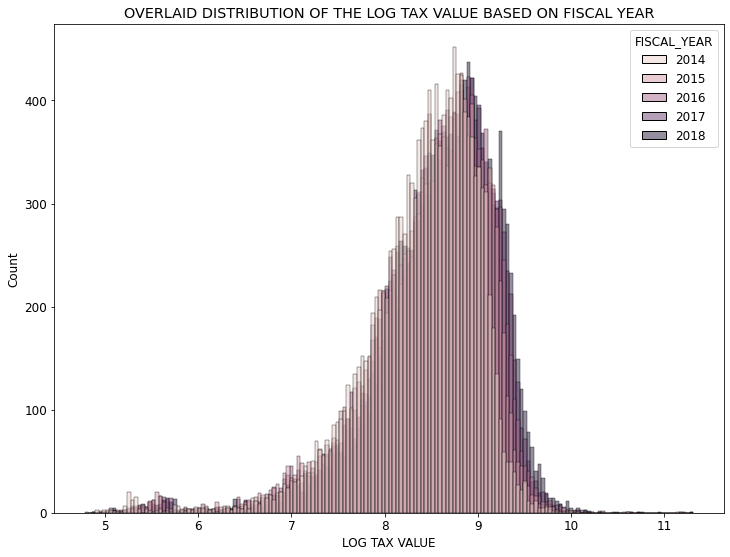

In [80]:
sns.histplot(data = edaDF, x = "LOG TAX VALUE", hue = "FISCAL_YEAR")
plt.title("OVERLAID DISTRIBUTION OF THE LOG TAX VALUE BASED ON FISCAL YEAR")
plt.show()


Text(0.5, 1.0, 'BOXPLOT: DISTRIBUTION OF THE LOG TAX VALUE BASED ON FISCAL YEAR')

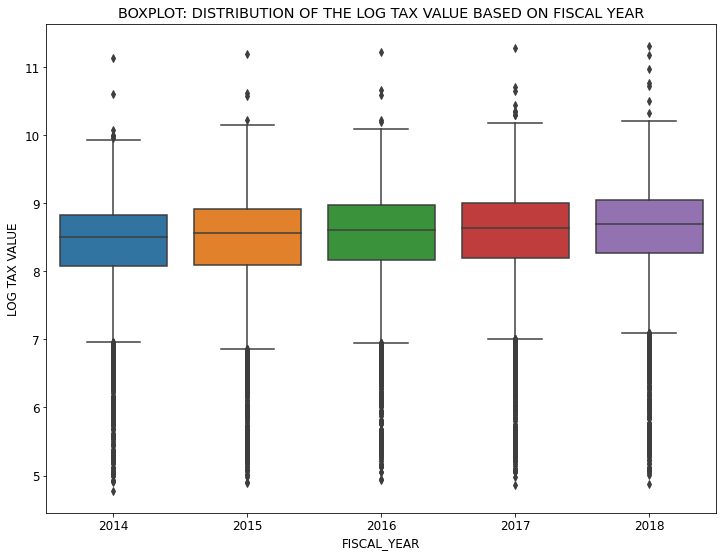

In [82]:
sns.boxplot(data = edaDF, x = "FISCAL_YEAR", y = "LOG TAX VALUE")
plt.title("BOXPLOT: DISTRIBUTION OF THE LOG TAX VALUE BASED ON FISCAL YEAR")

From our EDA, we notice that we have slightly left skewed data, where the median is smaller than the mean in regards to the "TAX VALUE"

## Part 2: Feature Engineering:

Let try to find features with strong associations with the taxed assesed value:

From the main webpage: we find:

There are a number of reasons why your value change might be different from the average percentage. Some of these include:
Being located in a neighborhood that had higher or lower sales prices, especially in relation to the assessment from the previous year:
1. Significant improvements to the property, demolitions, or having an under-construction status.
2. Required data changes from a discovery during inspection or estimate due to lack of entry (for example, property condition, number of bathrooms, measurement changes, etc.)
3. Having received an abatement in FY 2020.

In [41]:
df2018 = edaDF[edaDF["FISCAL_YEAR"] == 2018]

In a nutshell:

1. Unfortunately, the data doesn't tell us wether or not there were significant improvements to the property, demolitions or having under-construction status. AND also this might be really uncommon cases thus it isn't a good idea to hunt for this outliers

2. This point let us know some of the possible main features that are being used when estimating the TAX VALUE of a property. in this case, let us take a closer look these discoveries in the entry

3. Uncommon case

### BEDROOMS:

If we take a closer look at the LOG TAX value distribution based on the number of bedrooms we see a possitive association between the two.

Text(0.5, 1.0, 'BOXPLOT: DISTRIBUTION OG LOG TAX VALUE BASED ON NUMBER OF BEDROOMS')

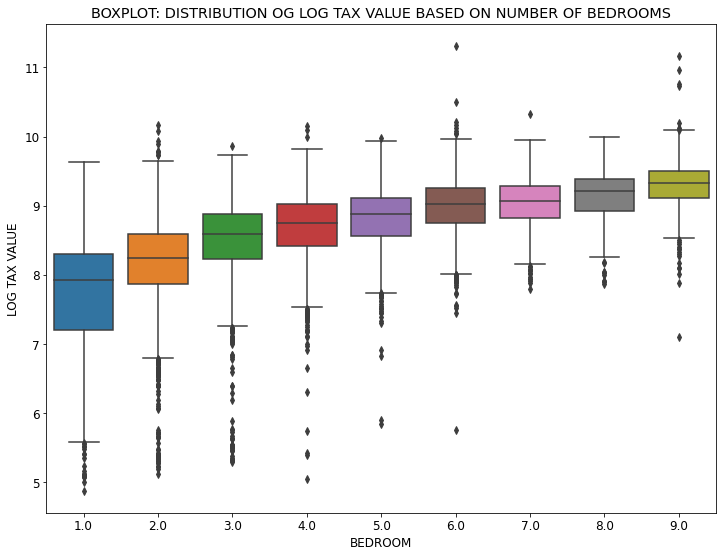

In [66]:
sns.boxplot(data = df2018 , x = 'BEDROOM', y = "LOG TAX VALUE")
plt.title("BOXPLOT: DISTRIBUTION OG LOG TAX VALUE BASED ON NUMBER OF BEDROOMS")

### PROPERTY OCCUPANCY:

While we know that there might be more influential attributes like the Square footage, we notice that in fact the Grade description stated in each of the properties does seem to influence the way the TAX value is ultimately being assesed.

In [43]:
df2018["OCCUP"] = df2018["OCCUP"].fillna(0)
df2018[["OCCUP","T-CODE"]].groupby("OCCUP").count()
df2018 = df2018[df2018["OCCUP"] > 0]

Text(0.5, 1.0, 'BOXPLOT: DISTRIBUTION OF LOG TAX VALUE BY HOUSE OCCUPANCY')

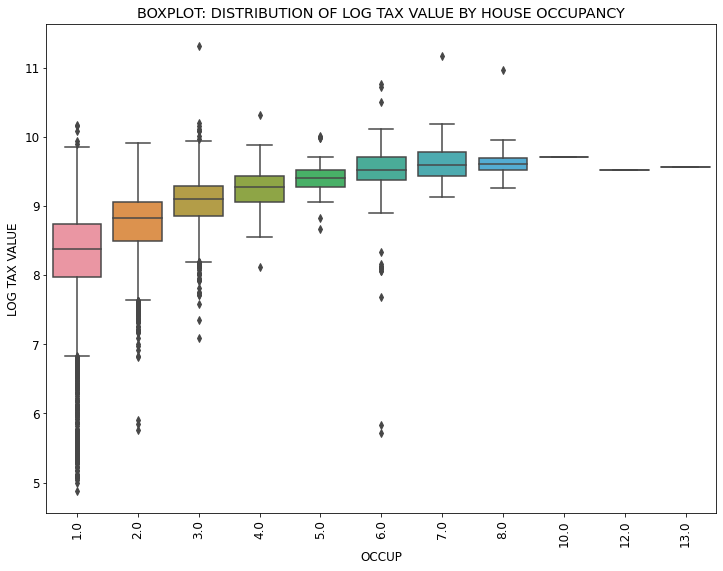

In [65]:
sns.boxplot(data = df2018 , x = 'OCCUP', y = "LOG TAX VALUE").tick_params(axis='x', rotation=90)
plt.title("BOXPLOT: DISTRIBUTION OF LOG TAX VALUE BY HOUSE OCCUPANCY")

### PARCEL VALUE:

When playing around with the data, I realized that the parcel value of the land has a strong association with the assesed tax value. We also notice two lines in the scatter plot. It might seem that the lines converge in some point. Hoewever, when creating a KDE plot in order to look at the densit of the data, we realize that we might be talking about two clusters.

The two clusters might mean that while, LOG PARCE VAL may have a strong association with the TAX VALUE, there are other factors that are taken into consideration that might ultimately lower the amount of taxes payed per property.

Text(0.5, 1.0, 'SCATTER PLOT: LOG TAX VALUE Vs. LOG PARCEL VAL')

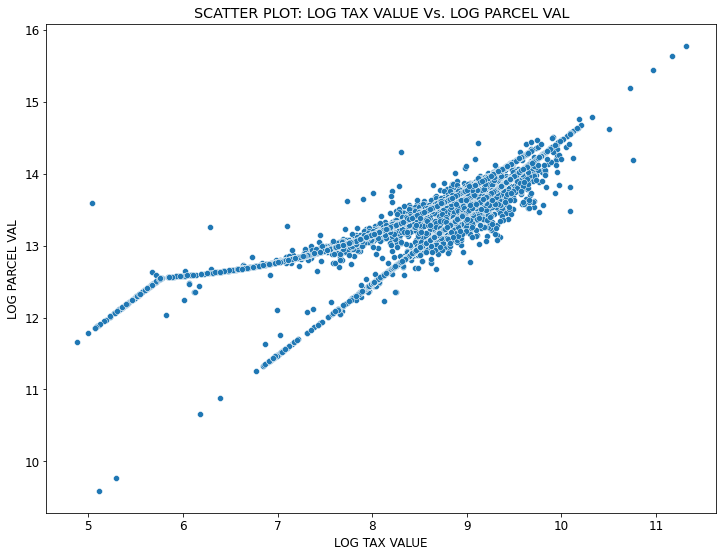

In [72]:
df2018["LOG PARCEL VAL"] = np.log(df2018["PARCEL VAL"])
sns.scatterplot(data = df2018 , x = 'LOG TAX VALUE' , y ="LOG PARCEL VAL")
plt.title("SCATTER PLOT: LOG TAX VALUE Vs. LOG PARCEL VAL")

Text(0.5, 1.0, 'KDE PLOT: LOG TAX VALUE Vs. LOG PARCEL VAL')

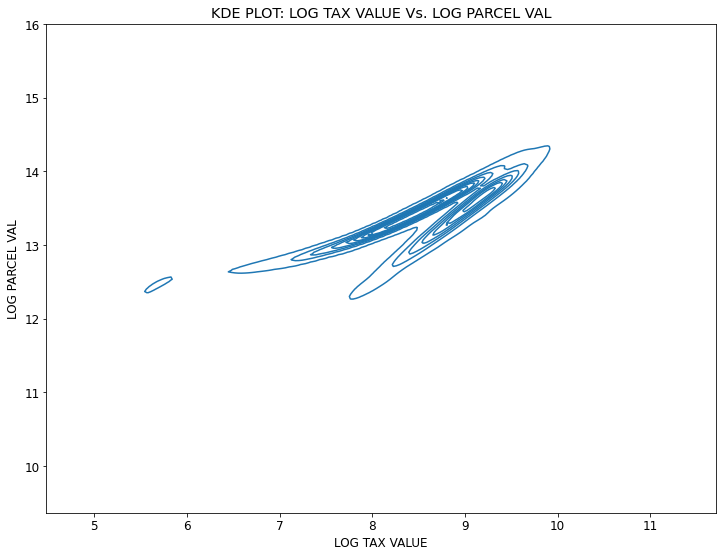

In [63]:
sns.kdeplot(data = df2018 , x = 'LOG TAX VALUE' , y ="LOG PARCEL VAL")
plt.title("KDE PLOT: LOG TAX VALUE Vs. LOG PARCEL VAL")

### LAND VALUE:

The positive association between the LOG LAND VAL and LOG TAX VALUE seems to good to ignore, we can see that as the value of the property increase so does the LOG TAX VAL for such property

<AxesSubplot:xlabel='LOG TAX VALUE', ylabel='LOG LAND VAL'>

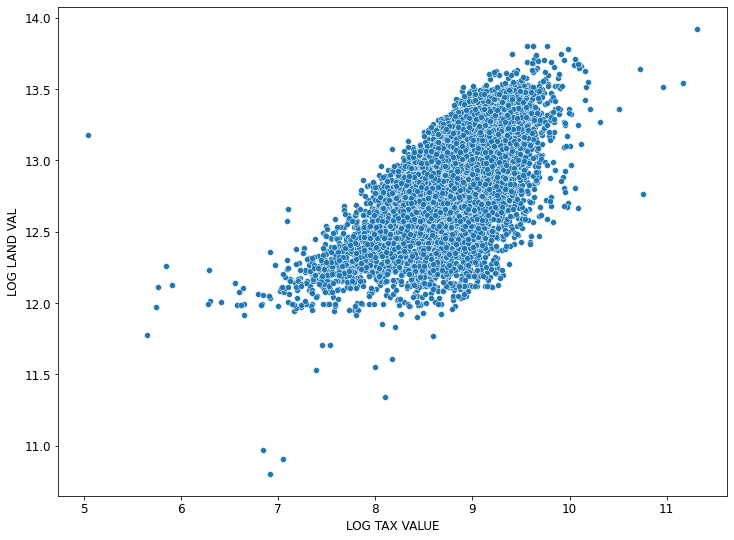

In [74]:
df2018["LOG LAND VAL"] = np.log(df2018["LAND VAL"])
sns.scatterplot(data = df2018 , x = 'LOG TAX VALUE' , y ="LOG LAND VAL")
sns.kdeplot(data = df2018 , x = 'LOG TAX VALUE' , y ="LOG LAND VAL")

### PART 3: Modeling:

In [48]:
#Copy of the DF modules and features we've done so far.
full_data = df2018.copy()
full_data = full_data[["LOG LAND VAL", "LOG PARCEL VAL", "BEDROOM", "OCCUP", "LOG TAX VALUE"]]
full_data = full_data[~full_data.isin([np.nan, np.inf, -np.inf]).any(1)]

# This makes the train-test split in this section reproducible across different runs 
# of the notebook. You do not need this line to run train_test_split in general


def train_test_split(data):
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    i = int(data_len * .80)
    return data.iloc[shuffled_indices[:i]],  data.iloc[shuffled_indices[i:]]

train, test = train_test_split(full_data)

In [49]:
X_train = train[["LOG LAND VAL", "LOG PARCEL VAL", "BEDROOM", "OCCUP"]]
y_train = train["LOG TAX VALUE"]

X_test = test[["LOG LAND VAL", "LOG PARCEL VAL", "BEDROOM", "OCCUP"]]
y_test = test["LOG TAX VALUE"]

In [75]:
from sklearn import linear_model as lm

linear_model_m1 = lm.LinearRegression(fit_intercept=True)

In [51]:
# Fit the 1st model
# Compute the fitted and predicted values of Sale Price for 1st model
y_fitted = linear_model_m1.fit(X_train,y_train).predict(X_train)
y_predicted = linear_model_m1.predict(X_test)

## RMSE

Let's compare the performance of our two regression models using the Root Mean Squared Error function that we created in Homework 5.

$$RMSE = \sqrt{\dfrac{\sum_{\text{houses in test set}}(\text{actual taxed assesed for house} - \text{predicted taxed assesed for house})^2}{\text{number of of houses}}}$$

The function is provided below.

In [52]:
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values
    Input:
      predicted (1D array): vector of predicted/fitted values
      actual (1D array): vector of actual values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2))

In [53]:
print("TRAIN RMSE:", rmse(y_fitted,y_train))
print("TEST RMSE:", rmse(y_predicted,y_test))
print("Predictor R^2 Score:" ,linear_model_m1.score(X_test,y_test))

TRAIN RMSE: 0.2620742676184208
TEST RMSE: 0.2545513154703702
Predictor R^2 Score: 0.7323936607560518


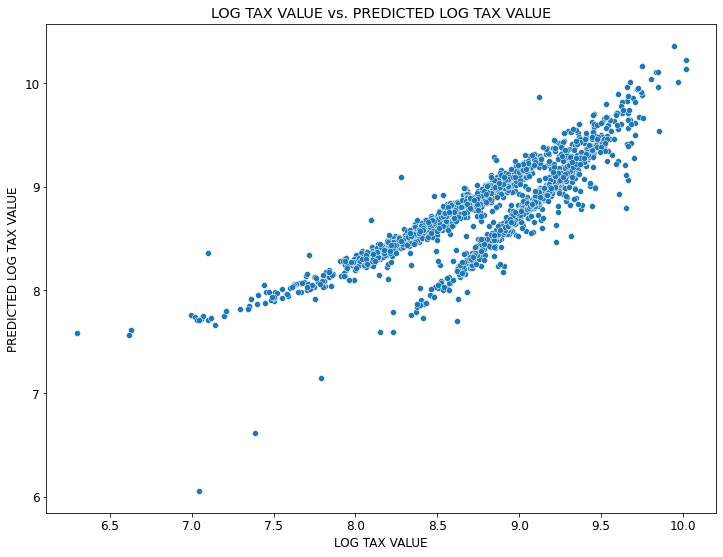

In [79]:
sns.scatterplot(x = y_test, y = y_predicted)
plt.title("LOG TAX VALUE vs. PREDICTED LOG TAX VALUE")
plt.ylabel("PREDICTED LOG TAX VALUE")
plt.show()

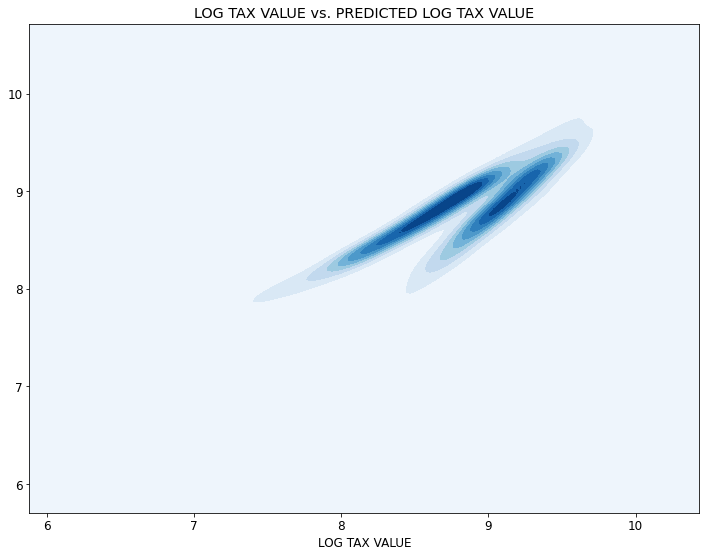

In [55]:
#sns.kdeplot(x = y_test, y = y_predicted)
# Add thresh parameter
sns.kdeplot(x=y_test, y=y_predicted, cmap="Blues", shade=True, thresh=0)
plt.title("LOG TAX VALUE vs. PREDICTED LOG TAX VALUE" , hue = "Categorical Varialble")
plt.ylabel("PREDICTED LOG TAX VALUE")
plt.show()

Further Analysis? Use the residential types in our favor.